In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


In [2]:
# Read in train data
trainfull = pd.read_csv('../HousePrices/trainfull.csv', index_col=0)

In [3]:
trainfull = trainfull.select_dtypes(exclude=['object'])

In [4]:
trainfull.fillna(0)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [5]:
from numpy import random
SEED = 42
random.seed(SEED)

In [6]:
from sklearn.model_selection import train_test_split
VAL_SIZE = 0.2
train, val = train_test_split(trainfull, test_size=VAL_SIZE)

In [7]:
train = train.fillna(0)
val = val.fillna(0)

In [8]:
col_train_bis = list(train.columns)
col_train_bis.remove('SalePrice')
Features = col_train_bis
X_train = train[Features]
X_val = val[Features]

In [9]:
y_train = train['SalePrice'].values
y_val = val['SalePrice'].values

In [10]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
scale = StandardScaler()
X_val = scale.fit_transform(X_val)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD, Adadelta, Adam
from keras.layers.advanced_activations import LeakyReLU

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer=Adadelta())

history = model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1168/1168 [==============================] - 0s 405us/step - loss: 181441.5423
Epoch 2/150
1168/1168 [==============================] - 0s 289us/step - loss: 181441.5419
Epoch 3/150
1168/1168 [==============================] - 0s 283us/step - loss: 181441.5419
Epoch 4/150
1168/1168 [==============================] - 0s 285us/step - loss: 181441.5420
Epoch 5/150
1168/1168 [==============================] - 0s 284us/step - loss: 181441.5420
Epoch 6/150
1168/1168 [==============================] - 0s 283us/step - loss: 181441.5416
Epoch 7/150
1168/1168 [==============================] - 0s 289us/step - loss: 181441.5419
Epoch 8/150
1168/1168 [==============================] - 0s 283us/step - loss: 181441.5410
Epoch 9/150
1168/1168 [==============================] - 0s 290us/step - loss: 181441.5387
Epoch 10/150
1168/1168 [==============================] - 0s 280us/step - loss: 181441.5365
Epoch 11/150
1168/1168 [==============================] - 0s 288us/step - loss: 181441.53

1168/1168 [==============================] - 0s 282us/step - loss: 15473.9240
Epoch 91/150
1168/1168 [==============================] - 0s 281us/step - loss: 15218.4492
Epoch 92/150
1168/1168 [==============================] - 0s 283us/step - loss: 15176.0289
Epoch 93/150
1168/1168 [==============================] - 0s 284us/step - loss: 15202.3111
Epoch 94/150
1168/1168 [==============================] - 0s 282us/step - loss: 15094.6491
Epoch 95/150
1168/1168 [==============================] - 0s 283us/step - loss: 14995.0864
Epoch 96/150
1168/1168 [==============================] - 0s 282us/step - loss: 15020.9862
Epoch 97/150
1168/1168 [==============================] - 0s 268us/step - loss: 15000.1116
Epoch 98/150
1168/1168 [==============================] - 0s 279us/step - loss: 14930.2598
Epoch 99/150
1168/1168 [==============================] - 0s 284us/step - loss: 14959.6838
Epoch 100/150
1168/1168 [==============================] - 0s 287us/step - loss: 14939.4432
Epoch 101/1

In [13]:
# Evaluation on the test set created by train_test_split
model.evaluate(X_train, y_train)

1168/1168 [==============================] - 0s 90us/step


14829.329703553081

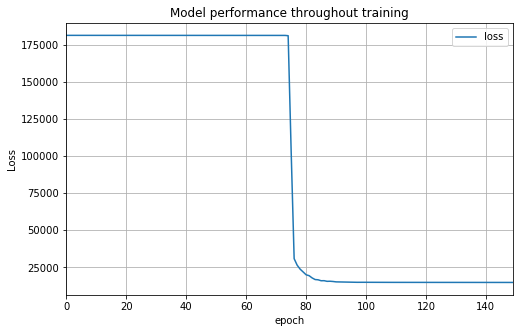

In [14]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
y_val_predict = model.predict(X_val)
y_val_predict

array([[159663.7  ],
       [346684.1  ],
       [117493.62 ],
       [171995.   ],
       [320309.72 ],
       [ 87298.99 ],
       [234970.5  ],
       [145914.77 ],
       [ 88474.1  ],
       [151914.67 ],
       [143930.77 ],
       [120570.555],
       [104763.234],
       [204149.72 ],
       [185321.33 ],
       [137421.39 ],
       [201983.97 ],
       [137532.95 ],
       [111433.14 ],
       [226099.83 ],
       [169512.88 ],
       [210898.89 ],
       [186632.66 ],
       [130248.125],
       [203970.16 ],
       [151184.03 ],
       [188066.38 ],
       [107096.195],
       [180083.92 ],
       [193359.48 ],
       [122998.016],
       [290986.   ],
       [210988.77 ],
       [115145.914],
       [277849.3  ],
       [156388.2  ],
       [146792.69 ],
       [212336.92 ],
       [343551.78 ],
       [ 96611.04 ],
       [118919.17 ],
       [255705.39 ],
       [120514.47 ],
       [333628.88 ],
       [133625.48 ],
       [137252.92 ],
       [118525.52 ],
       [13972

In [16]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val, y_val_predict)

17001.601669520547

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root_mean_squared_error = sqrt(mean_squared_error(y_val, y_val_predict))
print(root_mean_squared_error)

27419.198806401746


In [18]:
test = pd.read_csv('../HousePrices/test.csv', header=0)
test = test.fillna(0)

In [19]:
id_col = test['Id'].values.tolist()
scale = StandardScaler()
X_test = test[Features]
X_test = scale.fit_transform(X_test)

/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
prediction = model.predict(X_test)

In [21]:
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction
submission.to_csv('prediction_keras_allnum.csv', index=False)

In [22]:
submission[660:]

,Id,SalePrice
660,2121,95937.304688
661,2122,110753.429688
662,2123,91964.421875
663,2124,167745.609375
664,2125,139589.796875
...,...,...
1454,2915,93907.601562
1455,2916,98732.515625
1456,2917,180912.093750
1457,2918,110786.671875


# Score Kaggle
<center> Optimizer Adam (lr=0,001): </center>  
Dense 200, 100, 50, 25, 1 : 0.15986  
<center> Optimizer Adadelta: </center>  
Dense 200, 100, 50, 25, 1 : 0.14182